In [1]:
# import standard libraries
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
import time

# import our libraries
import bayes_helpers as bh
from utils import generate_data, run_toy_nn
from feed_forward import Feedforward
from nlm import NLM
from luna import LUNA

### Define LUNA Hyperparameters

### Generate Cubic Dataset

Generates 100 datapoints for train and 100 points for test according to the function

$$y = \frac{1}{2}x^3 + \epsilon$$

$$\epsilon \sim N(0, 3^2)$$

In [2]:
from autograd import numpy as np

training_sample_size = 100
training_seed = 124
valid_seed = 32847

######################
### Model Params
######################
prior_variance = 1 # chosen in the paper. declared "reasonable". who decided this
y_noise_variance = 9 # needs to match what the dataset itself is

######################
### Feed Forward Params
######################

####  activation function ####
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

#### optimization parameters ####
opt_params = {'step_size':1e-3,
          'max_iteration':100,
          'random_restarts':1,
          'optimizer':'adam'}

random_seed = np.random.RandomState(0)

real_max_iteration = 3500

########################
#### LUNA SPECIFIC  ####
########################

    # takes about 2 minutes to run

luna_architecture = {'width': 50,
            'hidden_layers': 2,
            'input_dim': 1,
            'output_dim': 50, #number of auxiliary functions, # note, in NLM, below, we change to 1
            'activation_fn_type': activation_fn_type,
            'activation_fn_params': 'rate=1',
            'activation_fn': activation_fn}

regularization_param_luna = 1e-1 # in the paper they searched over 1e-3,...,1e3 and chose 1e-1 for regularization

similarity_param = 1e0 # in the paper they searched over 1e-3,...,1e3 and chose 1e0 for similarity

In [3]:
#training data and validation data are different
x_train, y_train, x_test = generate_data(training_seed)
x_valid, y_valid, not_used = generate_data(valid_seed)

In [4]:
#JACK
# Edit grad_func_specs dictionary for fixed step sizes

grad_func_specs_80 = {'random' : 0.8}
grad_func_specs_60 = {'random' : 0.6} 
grad_func_specs_40 = {'random' : 0.4}
grad_func_specs_20 = {'random' : 0.2}
grad_func_specs_10 = {'random' : 0.1}
grad_func_specs_1 = {'random' : 0.01} 


### Train LUNA

`luna_base` samples from all x_train values

`luna_80percent` uses 80 % of indices for sampling

`luna_60percent` uses 60 % of indices for sampling

`luna_40percent` uses 40 % of indices for sampling

`luna_20percent` uses 20 % of indices for sampling

`luna_10percent` uses 10 % of indices for sampling

`luna_10percent` uses  1 % of indices for sampling

#### LUNA Base Model

In [5]:
t0 = time.time()
luna_base = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed)
luna_base.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 360418.7795272065; gradient mag: 188536.09913445535
Done Training
time: 80.31 seconds


#### LUNA 80% of indices sampled

In [6]:
t0 = time.time()
luna_80percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_80)
luna_80percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 249168.6837415735; gradient mag: 139008.0262319077
Done Training
time: 83.715 seconds


#### LUNA 60% of indices sampled

In [7]:
t0 = time.time()
luna_60percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_60)
luna_60percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 408719.3121385499; gradient mag: 197585.180498381
Done Training
time: 82.125 seconds


#### LUNA 40% of indices sampled

In [8]:
t0 = time.time()
luna_40percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_40)
luna_40percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 416633.0435236868; gradient mag: 216794.12392170235
Done Training
time: 83.096 seconds


#### LUNA 20% of indices sampled

In [9]:
t0 = time.time()
luna_20percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_20)
luna_20percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 344908.9150042191; gradient mag: 191043.34366536918
Done Training
time: 79.677 seconds


In [10]:
#### LUNA 10% of indices sampled

In [11]:
t0 = time.time()
luna_10percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_10)
luna_10percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 495494.14876656694; gradient mag: 241675.45208262297
Done Training
time: 79.056 seconds


In [12]:
#### LUNA 1% of indices sampled

In [13]:
t0 = time.time()
luna_1percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_1)
luna_1percent.train(x_train, y_train, opt_params)
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 0 lower bound 292922.19192685577; gradient mag: 154689.77592420016
Done Training
time: 80.297 seconds


### Compare Results

- Not sure what to conclude.

In [14]:
MSE_list = []
for model in [luna_1percent, luna_10percent, luna_20percent, luna_40percent, luna_60percent, luna_80percent, luna_base]:
    MSE_list.append(model.get_log_l(x_train,y_train,x_valid,y_valid))


In [15]:
MSE_list

[-134.4709983160772,
 -139.631581989369,
 -136.76876331722485,
 -133.38509385396648,
 -133.45903860633507,
 -137.0073445978877,
 -136.47975542038589]

Text(0.5, 1.0, 'log-likelihood vs Percentages of Indices Sampled')

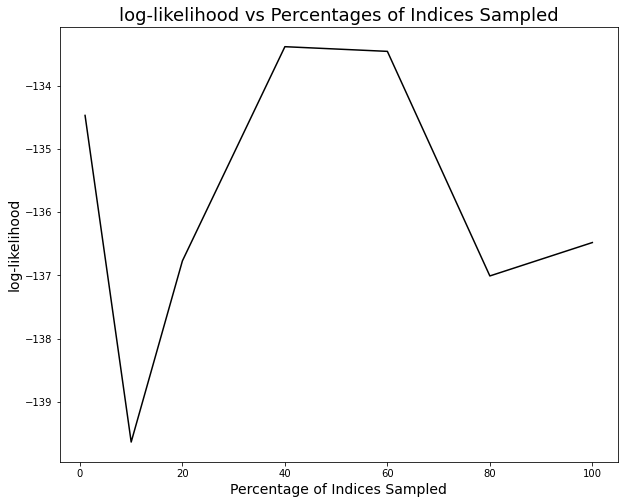

In [16]:
# xx == percentage of indices sampled
xx = [1,10,20,40,60,80,100]

fig, ax = plt.subplots(1,1,figsize = (10,8))
#ax = axes.flatten()
ax.plot(xx, MSE_list, 'black', label='log-likelihood given indices sampled')
ax.set_xlabel('Percentage of Indices Sampled', fontsize = 14)
ax.set_ylabel('log-likelihood', fontsize = 14)
ax.set_title('log-likelihood vs Percentages of Indices Sampled', fontsize = 18)
#ax.legend(fontsize=12);

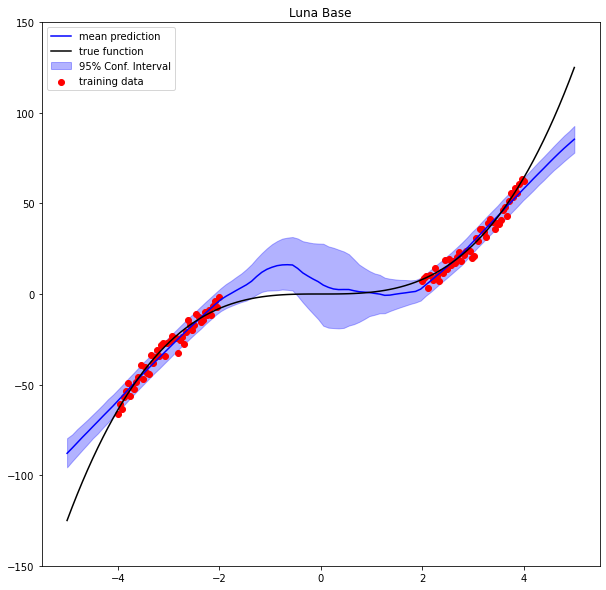

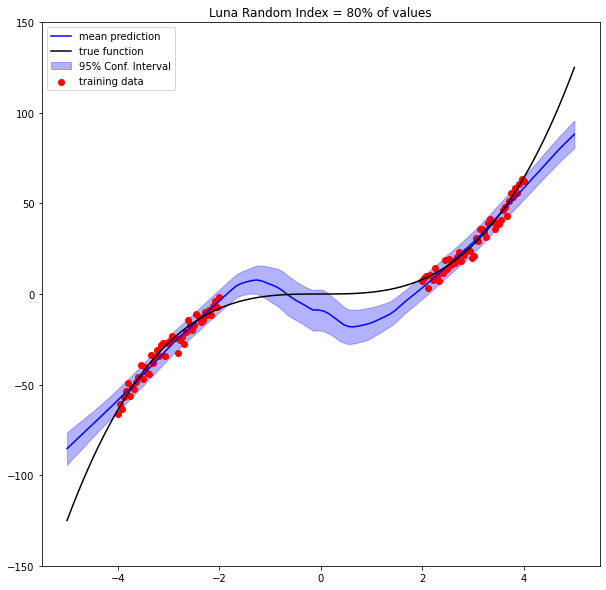

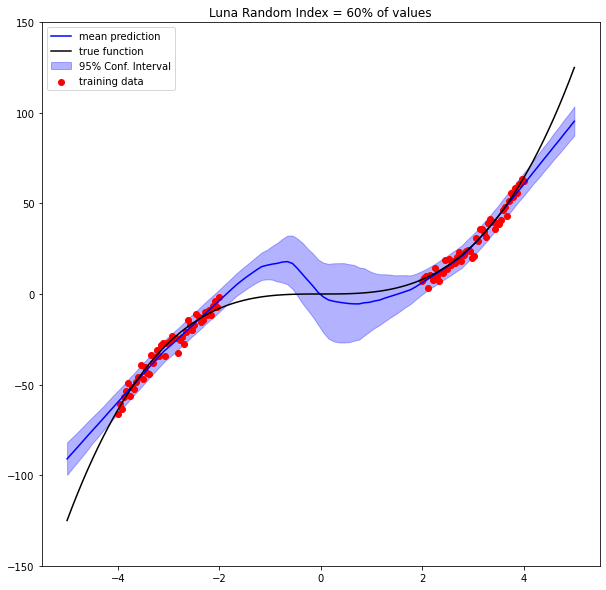

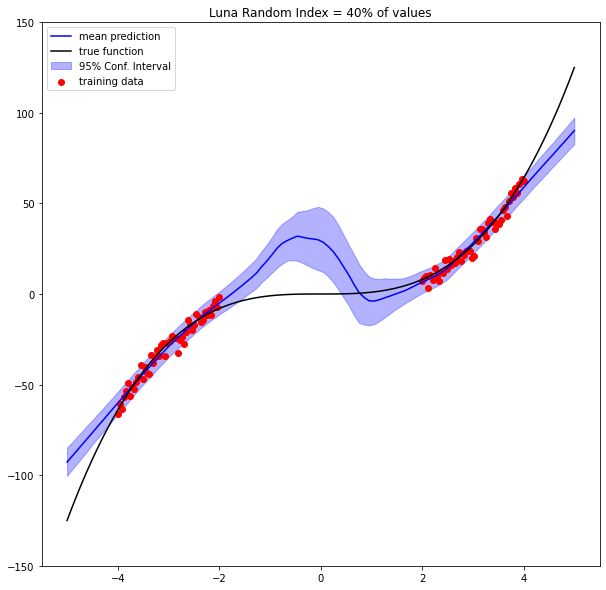

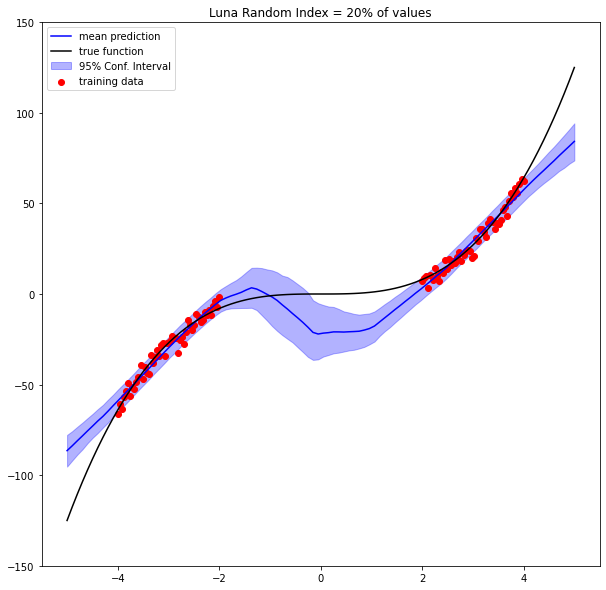

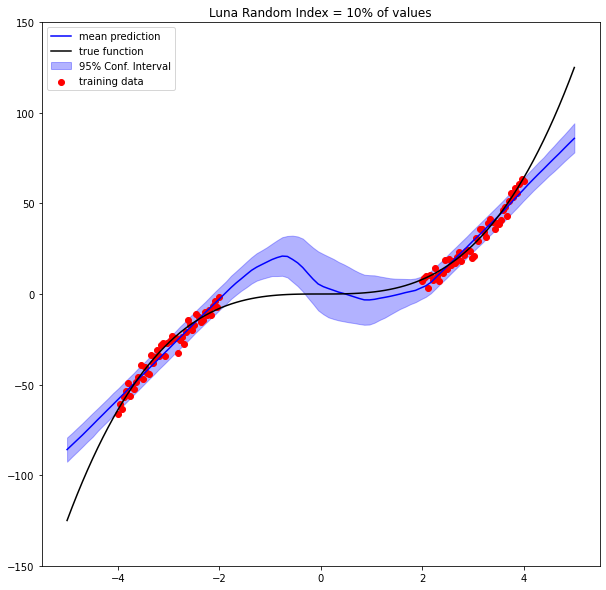

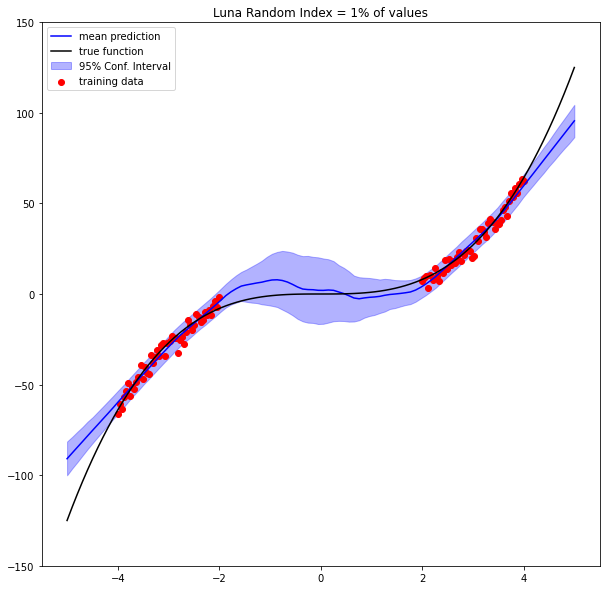

In [17]:
# fig, ax = plt.subplots(1,2, figsize = (12, 6))
i = 0
for name, model in {"Luna Base":luna_base, "Luna Random Index = 80% of values": luna_80percent, "Luna Random Index = 60% of values": luna_60percent,
                    "Luna Random Index = 40% of values": luna_40percent, "Luna Random Index = 20% of values": luna_20percent,
                    "Luna Random Index = 10% of values": luna_10percent, "Luna Random Index = 1% of values": luna_1percent}.items():
    posterior_predictions, posterior_predictive_samples = model.predict(x_test)
    bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,name)


#for name, model in {"Luna Base":luna_base, "Luna Fixed Step = 0.1": luna_1, "Luna Fixed Step = 0.001": luna_001,
#                   "Luna Fixed Step = 0.0001": luna_0001,}.items():
#    posterior_predictions, posterior_predictive_samples = model.predict(x_test)
#    bh.viz_pp_samples(x_train, y_train,x_test.flatten(),posterior_predictive_samples,name)